In [5]:
import os
import sys

import numpy as np
import matplotlib.pyplot as plt
import astropy
import speclite
from astropy.cosmology import default_cosmology
from astropy.units import Quantity
from slsim.lens_pop import LensPop
from slsim.Observations.roman_speclite import configure_roman_filters, filter_names
from tqdm import tqdm
from pprint import pprint
from hydra import initialize, compose
from glob import glob
import itertools

# set paths to various directories based on the machine this code is being executed on
with initialize(version_base=None, config_path='config'):
    config = compose(config_name='config.yaml')  # overrides=['machine=uzay']

array_dir, data_dir, figure_dir, pickle_dir, repo_dir  = config.machine.array_dir, config.machine.data_dir, config.machine.figure_dir, config.machine.pickle_dir, config.machine.repo_dir

# enable use of local modules
if repo_dir not in sys.path:
    sys.path.append(repo_dir)

# set matplotlib style
plt.style.use(f'{repo_dir}/mejiro/mplstyle/science.mplstyle')

import mejiro
from mejiro.helpers import survey_sim

In [ ]:
snr_files = glob(f'{data_dir}/snr_list_*.npy')
snr_list = list(itertools.chain.from_iterable([np.load(f) for f in snr_files]))

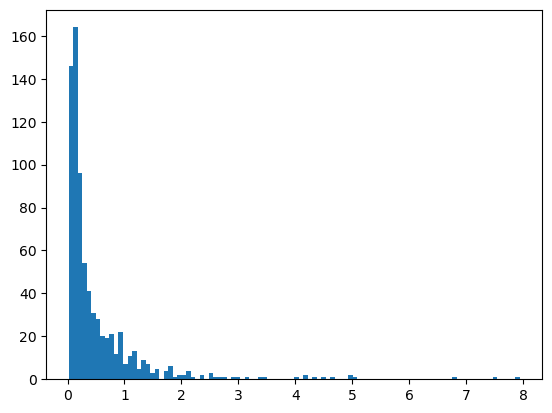

In [17]:
plt.hist(snr_list, bins=100)
plt.show()

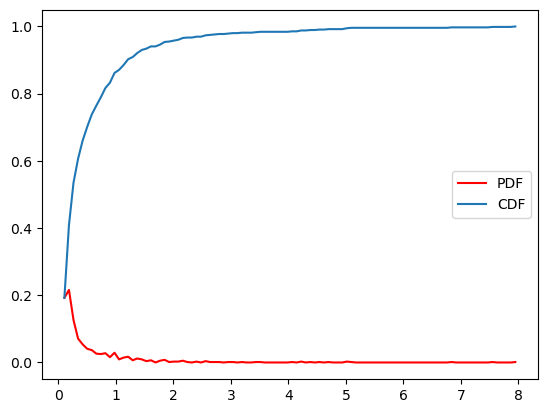

In [18]:
# getting data of the histogram 
count, bins_count = np.histogram(snr_list, bins=100) 
  
# finding the PDF of the histogram using count values 
pdf = count / sum(count) 
  
# using numpy np.cumsum to calculate the CDF 
# We can also find using the PDF values by looping and adding 
cdf = np.cumsum(pdf) 
  
# plotting PDF and CDF 
plt.plot(bins_count[1:], pdf, color="red", label="PDF") 
plt.plot(bins_count[1:], cdf, label="CDF") 
plt.legend() 
plt.show()